<a href="https://colab.research.google.com/github/Grato1998/APT1030-Coding-Challenge/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making sure the libraries are present

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

# Task 1: Data Exploration & Preprocessing

1. Load the dataset and explore it:

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.describe() # Display basic statistics of the dataset (`mean`, `std`, etc.).
df.isnull().sum() # Check for any missing values and handle them if needed.

# Perform data normalization or scaling using `StandardScaler`
X = df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=df.select_dtypes(include=['float64', 'int64']).columns)
df_scaled.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980


#### **Note: There are no missing values**

2. Visualize the data using:

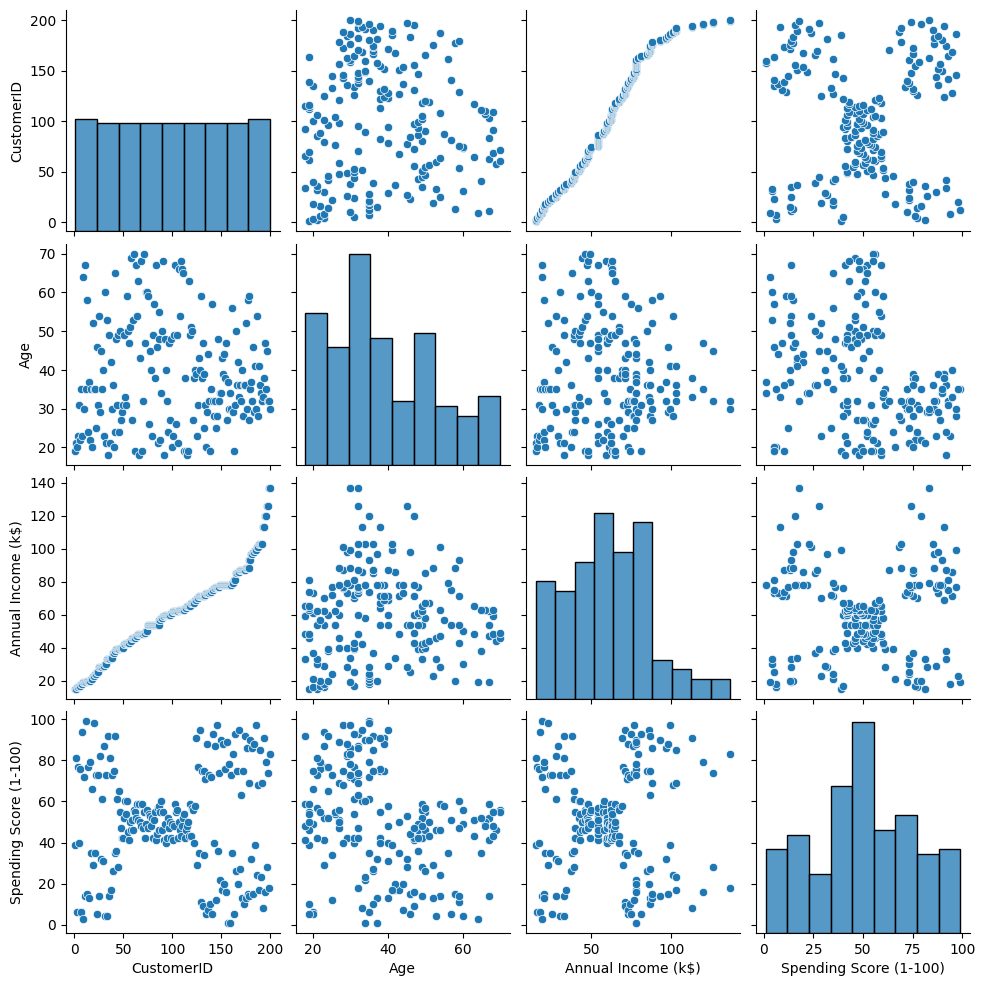

In [ ]:
sns.pairplot(df) #Pair plots to understand relationships between features.

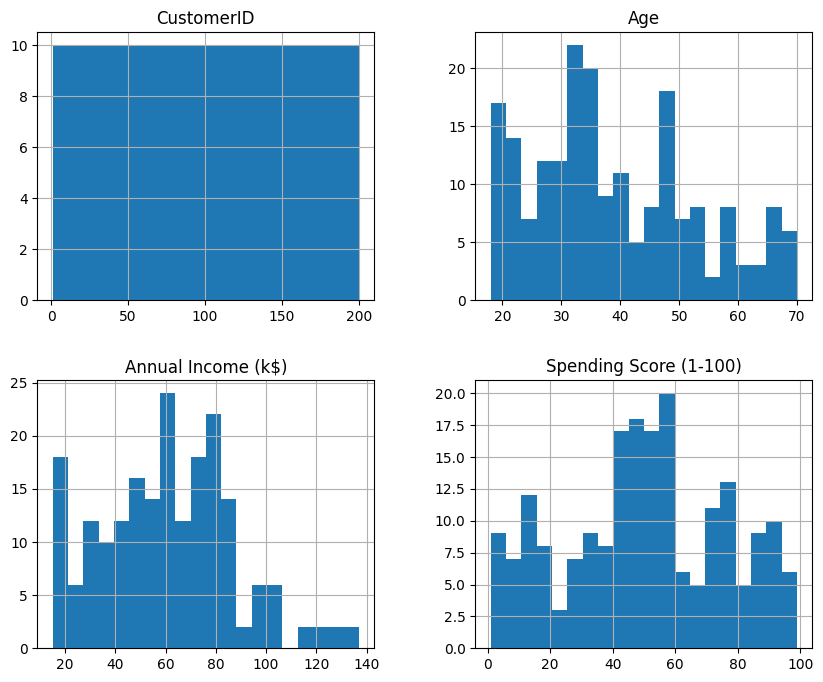

In [ ]:
#Histograms to view the distribution of the data.
df.hist(figsize=(10, 8), bins=20)
plt.show()


3. Analysis Questions


What trends or relationships do you observe in the data?

(a)  A perfect correlation between income and spending behavior does not exist; individuals with comparable income levels can exhibit significantly varied spending patterns.

(b) There is a notable relationship between age and spending, where younger customers are more likely to display significant variations in their spending scores.

(c) Female customers are generally characterized by a stronger presence of moderate to high spending scores, while male customers tend to exhibit a more extensive range, which includes a significant number of low-spending instances.

(d)  It is possible that the data reveals clusters that correspond to different segments of customer behavior, such as low spenders, moderate spenders, and high spenders. This could be advantageous for segmentation or targeting in business strategies.

# Task 2: K-Means Clustering

1. Implement K-Means clustering on the dataset with an appropriate number of clusters (you may try
different values of `k` and compare).


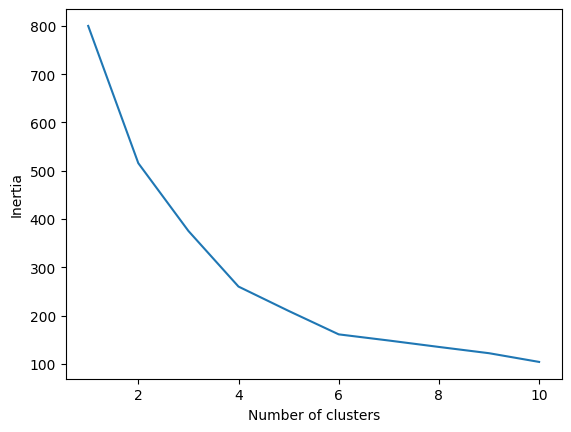

In [ ]:
# Plot the elbow curve to determine the optimal number of clusters.
k_range = range(1, 11)
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

2. Visualize the clusters:

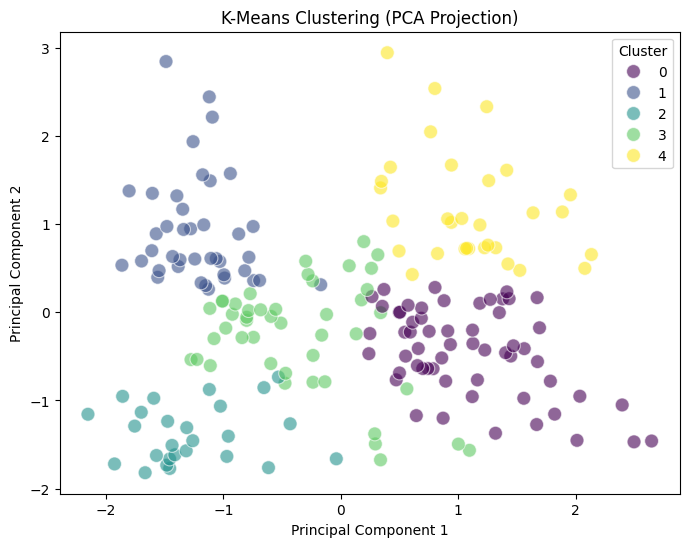

In [ ]:
# Plot a 2D scatter plot of the data, color-coded by clusters (use PCA if needed to reduce dimensions for visualization).
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

df['Cluster'] = labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.6)
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

3. Analysis Questions:

 What is the optimal number of clusters according to the elbow method?

 ans: 4 clusters



Interpret the characteristics of each cluster.

Cluster 1 consists of customers who have a high annual income but tend to spend sparingly. These individuals are likely to be more conservative with their purchases, favoring savings over luxury, so offering premium loyalty programs or exclusive discounts could be an effective strategy to encourage them to spend more.

Cluster 2 includes customers with both low annual income and low spending habits. They may be budget-conscious or only shop occasionally, so offering affordable deals and discounts could help boost their spending.

Cluster 3 comprises customers with lower incomes but high spending habits. These individuals, often younger or those focused on lifestyle purchases despite limited earnings, could benefit from flexible payment options, installment plans, or targeted promotions to encourage continued spending.

Cluster 4 consists of customers with both high income and high spending levels. As the most valuable group, they have significant purchasing power and are willing to make large purchases, so offering personalized experiences, VIP services, and premium offerings would be an effective strategy to cater to their needs.

# Task 3: Hierarchical Clustering

1. Implement hierarchical clustering using Agglomerative Clustering.

In [ ]:
agg_clustering_ward = AgglomerativeClustering(linkage='ward', n_clusters=5)
df['Cluster_ward'] = agg_clustering_ward.fit_predict(X_scaled)

agg_clustering_avg = AgglomerativeClustering(linkage='average', n_clusters=5)
df['Cluster_avg'] = agg_clustering_avg.fit_predict(X_scaled)

agg_clustering_complete = AgglomerativeClustering(linkage='complete', n_clusters=5)
df['Cluster_complete'] = agg_clustering_complete.fit_predict(X_scaled)

df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_ward', 'Cluster_avg', 'Cluster_complete']].head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster_ward,Cluster_avg,Cluster_complete
0,1,19,15,39,4,2,0
1,2,21,15,81,0,1,4
2,3,20,16,6,4,2,0
3,4,23,16,77,0,1,4
4,5,31,17,40,4,2,0


2. Create a dendrogram to visualize the hierarchical clustering results.

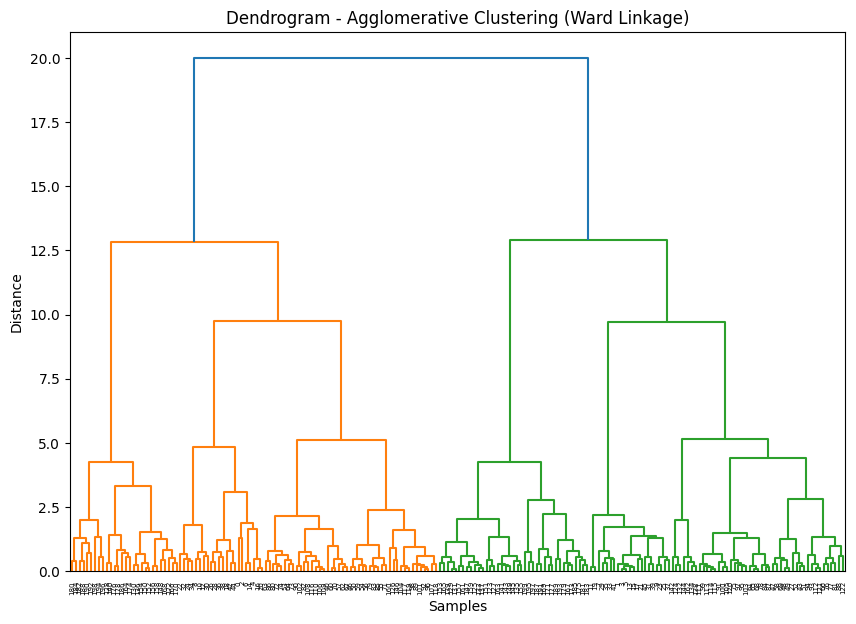

In [ ]:
plt.figure(figsize=(10, 7))
linked = linkage(X_scaled, method='ward')

dendrogram(linked)
plt.title('Dendrogram - Agglomerative Clustering (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

3. Analysis Questions:

How do the clusters formed using hierarchical clustering differ from K-Means?

K-Means Clustering divides data into a set number of clusters (k) by assigning each data point to the nearest centroid. It performs best when clusters are spherical in shape, but its results can be affected by the initial placement of centroids, making it sensitive to starting conditions.

where as,

Hierarchical Clustering (Agglomerative) creates a tree-like structure, or dendrogram, by progressively merging the closest clusters. Unlike K-Means, it doesn't require specifying the number of clusters in advance. This method can identify more complex cluster shapes and structures, offering flexibility to choose the number of clusters at various levels of the hierarchy.


Which linkage method produces the best results?

The application of Ward Linkage leads to a reduction in variance among clusters, thereby producing compact clusters that are well-separated from one another.

# Task 4: Dimensionality Reduction (PCA)

1. Perform PCA to reduce the dimensionality of the dataset.

Plot the explained variance ratio to understand how much variance is captured by each principal component

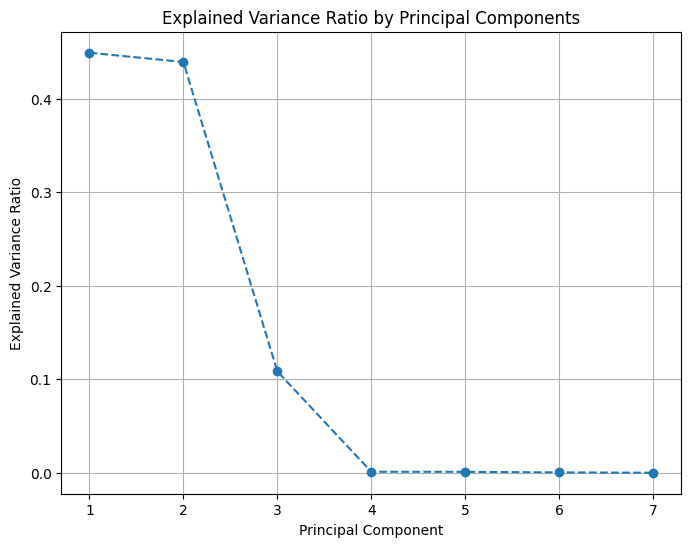

In [ ]:
df_numeric = df.drop(columns=['CustomerID', 'Gender'])

pca = PCA()
pca.fit(df_numeric)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

2. Visualize the data:


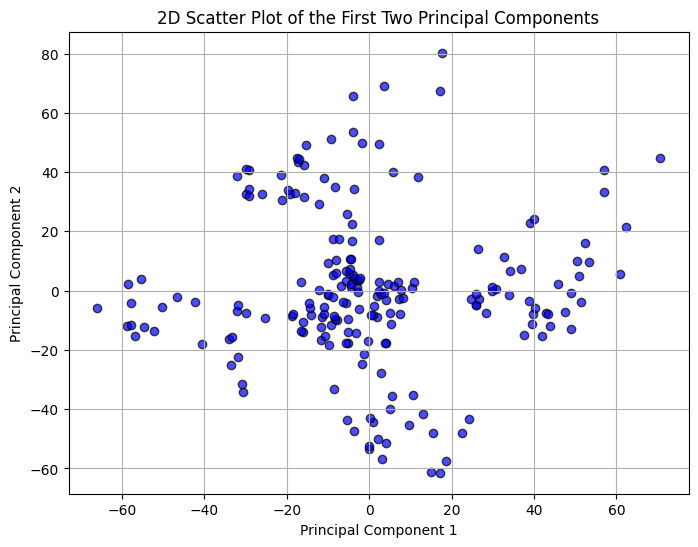

In [ ]:
#Create a 2D scatter plot of the first two principal components.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolors='k', alpha=0.7)
plt.title('2D Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


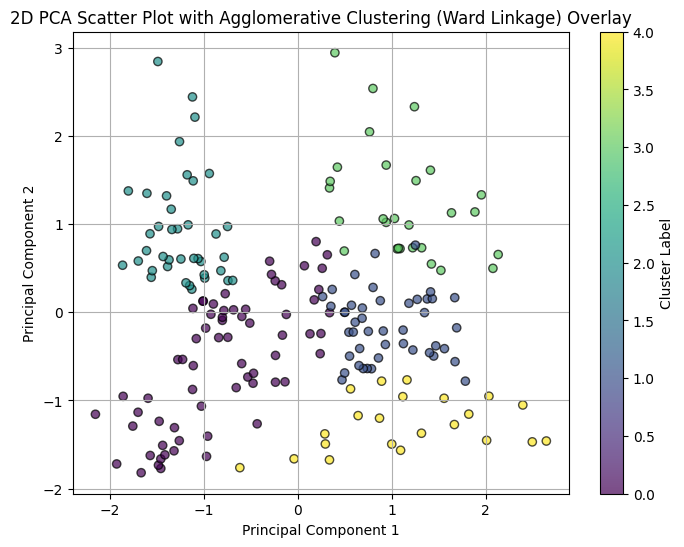

In [ ]:
# Overlay the clusters from K-Means or Hierarchical clustering on the PCA plot.

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)  # X_scaled is your normalized data

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Cluster_ward'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('2D PCA Scatter Plot with Agglomerative Clustering (Ward Linkage) Overlay')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')  # Show the color bar with cluster labels
plt.grid(True)
plt.show()


3. Analysis Questions:

How much variance is explained by the first two principal components?

The variance accounted for by the initial two principal components indicates the extent to which these components encapsulate the overall variability present in the dataset. In the context of Principal Component Analysis (PCA), the first principal component accounts for the maximum variation, while the second principal component accounts for the subsequent highest variation, and this pattern continues. By examining the explained variance ratio, one can determine the fraction of total variability in the data that is represented by these two components. A significant percentage of total variance explained by the first two components (for instance, 80-90%) suggests that they embody the most critical features of the data, implying that reducing the dataset to two dimensions retains a substantial amount of information.

How does PCA help in visualizing the clusters?

Principal Component Analysis (PCA) facilitates the reduction of data dimensionality to two dimensions or more, thereby enhancing the visualization of intricate high-dimensional datasets. By projecting the data onto its principal components, PCA effectively captures the most significant variance, enabling clearer visualization of clusters within a two-dimensional space.


# Task 5: Dimensionality Reduction (t-SNE)

1. Apply t-SNE to the dataset and reduce it to 2 dimensions for visualization.

<ipython-input-47-ea1f99eb137d>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.7, edgecolors='k', cmap='viridis')


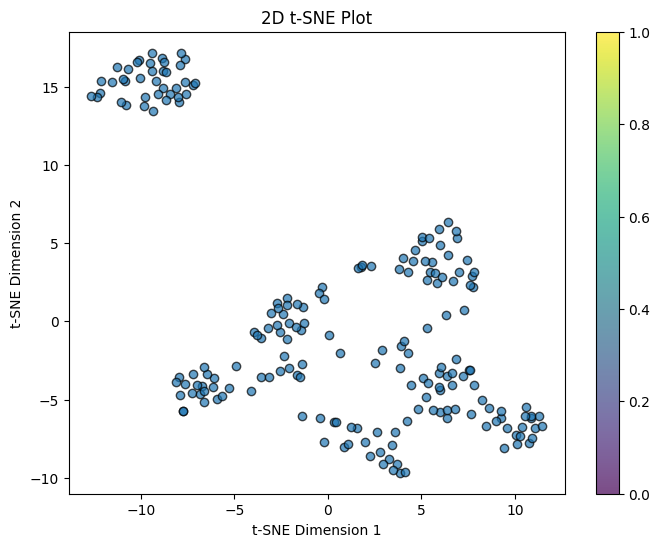

In [ ]:
# Plot a 2D scatter plot of the t-SNE results.

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)  # X_scaled is your normalized data

tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE1', 't-SNE2'])

plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.7, edgecolors='k', cmap='viridis')
plt.title('2D t-SNE Plot')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()



2. Compare the t-SNE visualization with the PCA plot.  


The primary aim of Principal Component Analysis (PCA) is to capture the global structure of the data while preserving variance across the dataset. This approach is particularly useful for visualizing the overall spread of data, especially when linear relationships are evident. However, PCA may not effectively distinguish between clusters, particularly when the data contains non-linear relationships. While it provides a broad perspective on the distribution of the data, clusters may overlap or lack clarity in the visual representation.

where as,

t-SNE, which stands for t-Distributed Stochastic Neighbor Embedding, focuses on maintaining local structures and the relationships between data points. It is particularly proficient at revealing distinct clusters, even when the data exhibits complex non-linear relationships. Consequently, t-SNE often results in a clearer delineation of clusters in two-dimensional plots than PCA. However, it is important to recognize that t-SNE is more computationally intensive and places greater emphasis on local data organization rather than the overall distribution.

3. Analysis Questions:

How does t-SNE differ from PCA in terms of visualization and cluster separation?

t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a non-linear technique that emphasizes the preservation of local structures. This characteristic enhances its ability to distinguish clusters in a manner that accurately represents the local distances and similarities among data points. It is particularly useful for visualizing intricate clusters within high-dimensional datasets.

where as,

Principal Component Analysis (PCA) is a linear technique designed to reduce dimensionality by maximizing the variance present in the dataset. While it is effective in uncovering overarching patterns, it may not delineate clusters as distinctly as t-SNE, particularly in scenarios where the data exhibits intricate structures or non-linear relationships.

Which dimensionality reduction technique gives a clearer cluster separation?

t-SNE provides enhanced clarity in the separation of clusters within intricate, high-dimensional datasets, particularly when the data exhibits non-linear clustering patterns.


# Bonus Task (Optional):

In [ ]:
kmeans_labels = kmeans.labels_
agg_labels = agg_clustering_ward.labels_

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score for Hierarchical Clustering (Ward): {agg_silhouette}")

Silhouette Score for K-Means: 0.40846873777345605
Silhouette Score for Hierarchical Clustering (Ward): 0.39002826186267214


Interpretation: The Silhouette Scores for both K-Means and Hierarchical Clustering are comparable, with K-Means exhibiting a slight advantage over Hierarchical Clustering (0.41 compared to 0.39). A Silhouette Score near 0.4 suggests that the clustering quality is acceptable, indicating a moderate level of separation and cohesion within the clusters. Nonetheless, there remains potential for enhancing the clarity of separation between the clusters.


